In [1]:
#Program to implement a simple qrng, measuring the ket(+) state in the computational basis.
from qiskit import *

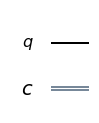

In [2]:
qc=QuantumCircuit(1,1) #Creating a quantum circuit with 1 qubit and 1 bit
qc.draw(output='mpl')

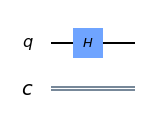

In [3]:
#Applying hadamard to take q from ket(0) to ket(+)
qc.h(0)
qc.draw(output='mpl')

In [4]:
#Checking the statevector of the circuit.
backend_req=Aer.get_backend('statevector_simulator') #setting up the backend
statevector_req=execute(qc,backend_req).result().get_statevector() #extracting the statevector
print(statevector_req)

[0.70710678+0.j 0.70710678+0.j]


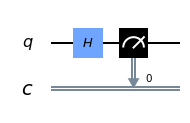

In [5]:
#Performing measurement on the qubit
qc.measure(0,0)
qc.draw(output='mpl')

In [6]:
#Executing the circuit on the qasm simulator to obtain the random string
n=10  #length of random string required
random_str=''  #empty string to store the random values
backend_sim_qd=Aer.get_backend('qasm_simulator')

for i in range(n):
    counts=execute(qc,backend_sim_qd,shots=1).result().get_counts() #executing the circuit
    for keys in counts:
        random_str+=keys #extracting the measurement result(ket(0) or ket(1)
    
print(random_str)  #Final random string obtained

#This string can be used in cryptography protocols like BB84 or Bell's inequality tests to select the measurement basis.

0110011110


In [7]:
#Executing the circuit on a real quantum device, provided by IBM. This will give an actual quantum random number(in binary).
#This will require an account on the IBM Quantum experience.

In [8]:
from qiskit import IBMQ

In [9]:
IBMQ.load_account()  #This requires that the account details are locally saved(done previously).

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider=IBMQ.get_provider('ibm-q')

In [11]:
qcomp=provider.get_backend('ibmq_armonk')

In [12]:
random_str='' 

In [17]:
#Execute all the remaining cells(including this) as many times as the length of the random string(for demonstration purposes)
#Performing the previous implementation using a for loop can take a lot of time.

job=execute(qc,qcomp,shots=1) #executing the circuit on the chosen quantum device  

In [18]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [19]:
#Extracting the measurement results
counts=job.result().get_counts() 
for keys in counts:
    random_str+=keys
    #print(keys)
#print(counts)

In [20]:
print(random_str)  #Final random string obtained

10
